In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
library(patchwork)

In [4]:
library(ggsci)

In [5]:
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [6]:
dd <- read_csv("../all_batch_metrics.csv")

New names:
• `` -> `...1`
Rows: 27 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ...1, input_h5ad, unintegrated_h5ad, species_key, batch_key, cluste...
dbl (8): NMI_cluster/label, ARI_cluster/label, iLISI, cLISI, graph_conn, pcr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
head(dd)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.8032567,0.7157093,3.080208e-03,1.0000000,0.9117984,0.7439902,0.6470689,0.7755378,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,fastMNN
value,0.8267143,0.7393915,1.577180e-02,1.0000000,0.9114283,0.7615489,0.6422887,0.7760512,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,harmony
value,0.5939153,0.6266316,3.847025e-01,0.9943179,0.5697591,0.9362925,0.4998089,0.6921461,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,LIGER
value,0.7545289,0.5707782,2.220446e-16,1.0000000,0.7981874,0.5763800,0.5983165,0.6594126,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scanorama
value,0.3309233,0.1872696,4.971804e-01,0.9444988,0.8607535,0.9769418,0.5608409,0.8215441,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scVI
value,0.8580277,0.8649991,1.633318e-01,0.9998744,0.9351485,0.8412813,0.6482314,0.8276025,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,seuratCCA


In [8]:
tail(dd)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.6337413,0.4409254,1.604065e-01,0.9983906,0.6520356,0.9243261,0.4579363,0.7390494,rliger_uinmf_metadata_many_higher_expr_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_many_higher_expr.h5ad,species,species,cell_ontology_mapped,rligerUINMF
value,0.5934674,0.3528422,1.787799e-01,0.9978906,0.6111984,0.9003124,0.4357035,0.7795612,rliger_uinmf_metadata_many_higher_homology_conf_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_many_higher_homology_conf.h5ad,species,species,cell_ontology_mapped,rligerUINMF
value,0.5841404,0.3613592,1.496041e-01,0.9973402,0.6576681,0.9255869,0.4627166,0.7385507,rliger_uinmf_metadata_one2one_only_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_one2one_only.h5ad,species,species,cell_ontology_mapped,rligerUINMF
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/h5ad_homology_concat/metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,SAMap
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/h5ad_homology_concat/metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_ontology_mapped,SAMap
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/h5ad_homology_concat/metadata_nf_one2one_only.h5ad,species,species,cell_ontology_mapped,SAMap


In [9]:
dd[dd == 'rligerUINMF'] = 'LIGER_UINMF'

In [10]:
color_pal = c( pal_npg("nrc")(8), "#F4D714")
color_pal

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#F4D714"

## Batch removal

In [11]:
dd = dd %>% mutate(homology_method = gsub("metadata_nf_|rliger_uinmf_metadata_", "", input_h5ad)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad|_SAMap_integrated.h5ad", "", homology_method)) %>%
arrange(desc(pcr))  %>% 
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method))

## minmax scale batch scores

In [12]:
dd

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/h5ad_homology_concat/metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,SAMap,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/h5ad_homology_concat/metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_ontology_mapped,SAMap,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/h5ad_homology_concat/metadata_nf_one2one_only.h5ad,species,species,cell_ontology_mapped,SAMap,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm
value,0.6407075,0.6230579,1.473360e-01,0.9916804,0.9373082,0.9801308,0.5577949,0.7990565,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_ontology_mapped,scVI,stronger homology
value,0.7549424,0.6889677,1.114775e-01,0.9981726,0.9263442,0.9775111,0.5606982,0.8162676,metadata_nf_one2one_only_scVI_integrated.h5ad,metadata_nf_one2one_only.h5ad,species,species,cell_ontology_mapped,scVI,one2one only
value,0.3309233,0.1872696,4.971804e-01,0.9444988,0.8607535,0.9769418,0.5608409,0.8215441,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scVI,higher expression
value,0.5939153,0.6266316,3.847025e-01,0.9943179,0.5697591,0.9362925,0.4998089,0.6921461,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,LIGER,higher expression
value,0.5841404,0.3613592,1.496041e-01,0.9973402,0.6576681,0.9255869,0.4627166,0.7385507,rliger_uinmf_metadata_one2one_only_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_one2one_only.h5ad,species,species,cell_ontology_mapped,LIGER_UINMF,one2one only
value,0.6337413,0.4409254,1.604065e-01,0.9983906,0.6520356,0.9243261,0.4579363,0.7390494,rliger_uinmf_metadata_many_higher_expr_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_many_higher_expr.h5ad,species,species,cell_ontology_mapped,LIGER_UINMF,higher expression


In [13]:
dd[which(dd$integration_method == 'SAMap'), 'homology_method'] = 'full'

In [14]:
dd = dd %>% 
mutate(homology_method = factor(homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))) 

In [15]:
ranked = dd %>% 
mutate(graph_conn_scaled = (graph_conn - min(graph_conn)) / (max(graph_conn) - min(graph_conn))) %>% 
mutate(pcr_scaled = (pcr - min(pcr)) / (max(pcr) - min(pcr))) %>% 
mutate(iLISI_scaled = (iLISI - min(iLISI)) / (max(iLISI) - min(iLISI))) %>% 
mutate(silhouette_batch_scaled = (silhouette_batch - min(silhouette_batch)) / (max(silhouette_batch) - min(silhouette_batch))) %>% 
mutate(avg_score = (graph_conn_scaled + pcr_scaled + iLISI_scaled + silhouette_batch_scaled) * 0.25) %>% 
arrange(desc(avg_score)) %>% 
mutate(cLISI_scaled = (cLISI- min(cLISI)) / (max(cLISI) - min(cLISI))) %>% 
mutate(silhouette_scaled = (silhouette - min(silhouette)) / (max(silhouette) - min(silhouette))) %>% 
mutate(NMI_scaled = (`NMI_cluster/label` - min(`NMI_cluster/label`)) / (max(`NMI_cluster/label`) - min(`NMI_cluster/label`)))  %>% 
mutate(ARI_scaled = (`ARI_cluster/label` - min(`ARI_cluster/label`)) / (max(`ARI_cluster/label`) - min(`ARI_cluster/label`)))

In [16]:
ranked

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,⋯,homology_method,graph_conn_scaled,pcr_scaled,iLISI_scaled,silhouette_batch_scaled,avg_score,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
value,0.3309233,0.1872696,4.971804e-01,0.9444988,0.8607535,0.9769418,0.5608409,0.8215441,metadata_nf_many_higher_expr_scVI_integrated.h5ad,⋯,higher expression,0.7874234,0.945816087,1.000000e+00,0.961582601,0.9237055,0.0000000,0.54781704,0.0000000,0.0000000
value,0.6407075,0.6230579,1.473360e-01,0.9916804,0.9373082,0.9801308,0.5577949,0.7990565,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,⋯,stronger homology,0.9666816,0.953309803,2.963432e-01,0.829568639,0.7614758,0.8501007,0.53448235,0.5761598,0.6399138
value,0.7549424,0.6889677,1.114775e-01,0.9981726,0.9263442,0.9775111,0.5606982,0.8162676,metadata_nf_one2one_only_scVI_integrated.h5ad,⋯,one2one only,0.9410088,0.947153865,2.242194e-01,0.930606387,0.7607471,0.9670751,0.54719240,0.7886224,0.7366960
value,0.8580277,0.8649991,1.633318e-01,0.9998744,0.9351485,0.8412813,0.6482314,0.8276025,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,⋯,higher expression,0.9616245,0.627030513,3.285161e-01,0.997148222,0.7285799,0.9977367,0.93038888,0.9803482,0.9951815
value,0.8685939,0.8682806,1.569363e-01,0.9998553,0.9158656,0.8438411,0.6474743,0.8280883,metadata_nf_many_higher_homology_conf_seuratCCA_integrated.h5ad,⋯,stronger homology,0.9164722,0.633045843,3.156526e-01,1.000000000,0.7162927,0.9973928,0.92707438,1.0000000,1.0000000
value,0.8547903,0.8596499,1.608516e-01,1.0000000,0.9159856,0.8396517,0.6359733,0.8239109,metadata_nf_one2one_only_seuratCCA_integrated.h5ad,⋯,one2one only,0.9167532,0.623201083,3.235277e-01,0.975476682,0.7097397,1.0000000,0.87672636,0.9743270,0.9873267
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,⋯,full,0.8163737,1.000000000,0.000000e+00,0.773458675,0.6474581,1.0000000,0.62593300,0.6988357,0.4766622
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,⋯,full,0.8163737,1.000000000,0.000000e+00,0.773458675,0.6474581,1.0000000,0.62593300,0.6988357,0.4766622
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,⋯,full,0.8163737,0.999999999,0.000000e+00,0.773458675,0.6474581,1.0000000,0.62593300,0.6988357,0.4766622


In [17]:
## set the order of levels
ranked$homology_method = factor(ranked$homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))

In [18]:
ranked

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,⋯,homology_method,graph_conn_scaled,pcr_scaled,iLISI_scaled,silhouette_batch_scaled,avg_score,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
value,0.3309233,0.1872696,4.971804e-01,0.9444988,0.8607535,0.9769418,0.5608409,0.8215441,metadata_nf_many_higher_expr_scVI_integrated.h5ad,⋯,higher expression,0.7874234,0.945816087,1.000000e+00,0.961582601,0.9237055,0.0000000,0.54781704,0.0000000,0.0000000
value,0.6407075,0.6230579,1.473360e-01,0.9916804,0.9373082,0.9801308,0.5577949,0.7990565,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,⋯,stronger homology,0.9666816,0.953309803,2.963432e-01,0.829568639,0.7614758,0.8501007,0.53448235,0.5761598,0.6399138
value,0.7549424,0.6889677,1.114775e-01,0.9981726,0.9263442,0.9775111,0.5606982,0.8162676,metadata_nf_one2one_only_scVI_integrated.h5ad,⋯,one2one only,0.9410088,0.947153865,2.242194e-01,0.930606387,0.7607471,0.9670751,0.54719240,0.7886224,0.7366960
value,0.8580277,0.8649991,1.633318e-01,0.9998744,0.9351485,0.8412813,0.6482314,0.8276025,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,⋯,higher expression,0.9616245,0.627030513,3.285161e-01,0.997148222,0.7285799,0.9977367,0.93038888,0.9803482,0.9951815
value,0.8685939,0.8682806,1.569363e-01,0.9998553,0.9158656,0.8438411,0.6474743,0.8280883,metadata_nf_many_higher_homology_conf_seuratCCA_integrated.h5ad,⋯,stronger homology,0.9164722,0.633045843,3.156526e-01,1.000000000,0.7162927,0.9973928,0.92707438,1.0000000,1.0000000
value,0.8547903,0.8596499,1.608516e-01,1.0000000,0.9159856,0.8396517,0.6359733,0.8239109,metadata_nf_one2one_only_seuratCCA_integrated.h5ad,⋯,one2one only,0.9167532,0.623201083,3.235277e-01,0.975476682,0.7097397,1.0000000,0.87672636,0.9743270,0.9873267
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,⋯,full,0.8163737,1.000000000,0.000000e+00,0.773458675,0.6474581,1.0000000,0.62593300,0.6988357,0.4766622
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,⋯,full,0.8163737,1.000000000,0.000000e+00,0.773458675,0.6474581,1.0000000,0.62593300,0.6988357,0.4766622
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,⋯,full,0.8163737,0.999999999,0.000000e+00,0.773458675,0.6474581,1.0000000,0.62593300,0.6988357,0.4766622


In [19]:

batch = ranked %>% arrange(avg_score) %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>%
ggplot(aes(x = fct_inorder(type), y = avg_score, color= integration_method)) + 
geom_point(aes(shape = fct_inorder(homology_method), size = 2)) + coord_flip() + common_0x + 
scale_color_npg(name = 'integration method') +
labs(x = 'Species mixing score', y = 'integration strategy') + ylim(0,1) + scale_shape(name = 'homology method')

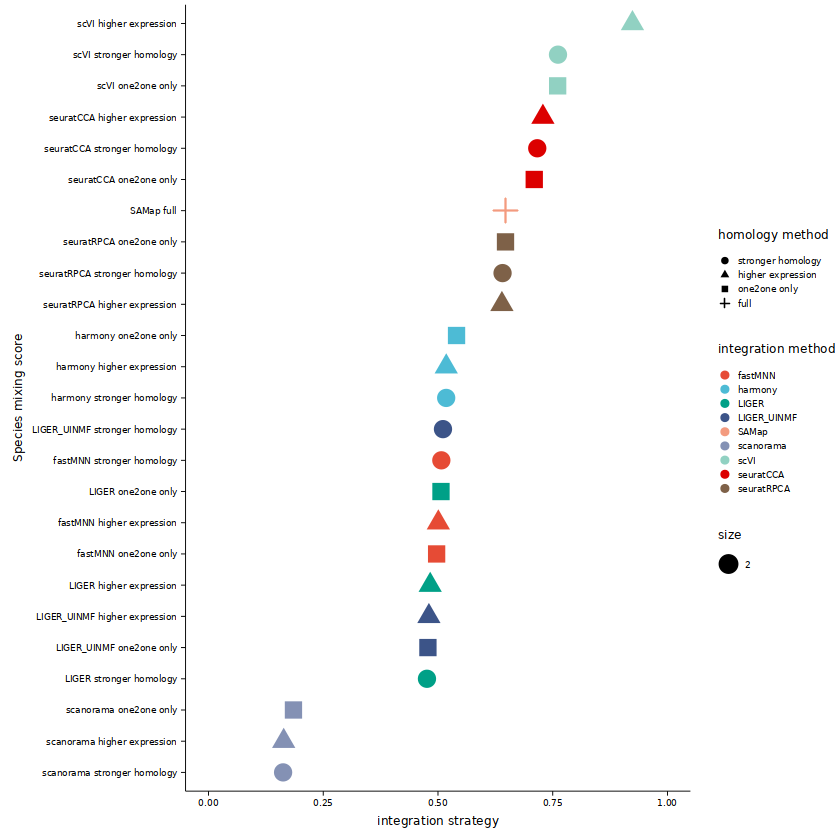

In [20]:
batch

## Biology conservation

In [21]:
cs <- read_csv("../../../results/all_sccaf.csv")

Rows: 2795 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): cell_type, type_label, from_species, to_species, integration_method...
dbl (6): ROC_AUC, PR_AUC, test_acc, CV_acc, adj_rand_score, pct_cell_type_kept

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [22]:
cs[cs$integration_method == 'SAMap', 'homology_method'] = 'full'
cs[cs == 'hs'] = 'hsapiens'
cs[cs == 'mm'] = 'mmusculus'
cs[cs == 'mf'] = 'mfascicularis'
cs[cs == 'one2one'] = 'one2one_only'

In [23]:
levels(factor(cs$integration_method))
levels(factor(cs$homology_method))

[1] "fastMNN"      "harmony"      "LIGER"        "rligerUINMF"  "SAMap"       
 [6] "scanorama"    "scVI"         "seuratCCA"    "seuratRPCA"   "unintegrated"

[1] "full"

In [24]:
orig = cs %>% filter(integration_method == 'unintegrated')

In [25]:
intg = cs %>% filter(integration_method != 'unintegrated') %>% filter(type_label == 'original')

In [26]:
intg = intg %>% mutate(homology_method = gsub("metadata_nf_|rliger_uinmf_metadata_", "", input_file)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad", "", homology_method)) %>%
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method))
intg[intg$integration_method == 'SAMap', 'homology_method'] = 'full'

In [27]:
head(intg)

cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Macrophage,0.8842659,0.9994752,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression
cardiac muscle cell,0.9991290,0.9991675,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression
endothelial cell,0.9669948,0.9896448,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression
fat cell,0.9941769,0.9996946,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression
macrophage,0.1564450,0.9612984,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression
pericyte cell,0.7488045,0.9979197,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression


## accuracy loss

In [28]:
acc_loss = merge(orig, intg, by = c("cell_type", "from_species"), suffixes = c("_orig", "_intg")) %>% 
mutate(acc_loss = abs(test_acc_orig - test_acc_intg))

In [29]:
head(acc_loss)

,cell_type,from_species,ROC_AUC_orig,PR_AUC_orig,test_acc_orig,CV_acc_orig,type_label_orig,to_species_orig,integration_method_orig,input_file_orig,⋯,CV_acc_intg,type_label_intg,to_species_intg,integration_method_intg,input_file_intg,key_use_intg,adj_rand_score_intg,pct_cell_type_kept_intg,homology_method_intg,acc_loss
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,B cell,hsapiens,0.8983911,0.9999382,0.9887898,0.9830737,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf_mm/hsapiens_cell_ontology_mapped.h5ad,⋯,0.9703852,original,hsapiens,seuratRPCA,metadata_nf_many_higher_expr_seuratRPCA_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression,2.118457e-03
2,B cell,hsapiens,0.8983911,0.9999382,0.9887898,0.9830737,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf_mm/hsapiens_cell_ontology_mapped.h5ad,⋯,0.9781367,original,hsapiens,seuratCCA,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression,8.826904e-05
3,B cell,hsapiens,0.8983911,0.9999382,0.9887898,0.9830737,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf_mm/hsapiens_cell_ontology_mapped.h5ad,⋯,0.9012716,original,hsapiens,fastMNN,metadata_nf_many_higher_homology_conf_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,stronger homology,1.359343e-02
4,B cell,hsapiens,0.8983911,0.9999382,0.9887898,0.9830737,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf_mm/hsapiens_cell_ontology_mapped.h5ad,⋯,0.9654531,original,hsapiens,harmony,metadata_nf_one2one_only_harmony_integrated.h5ad,cell_ontology_base,NaN,NaN,one2one only,4.854797e-03
5,B cell,hsapiens,0.8983911,0.9999382,0.9887898,0.9830737,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf_mm/hsapiens_cell_ontology_mapped.h5ad,⋯,0.9668616,original,hsapiens,scVI,metadata_nf_one2one_only_scVI_integrated.h5ad,cell_ontology_base,NaN,NaN,one2one only,1.765381e-03
6,B cell,hsapiens,0.8983911,0.9999382,0.9887898,0.9830737,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf_mm/hsapiens_cell_ontology_mapped.h5ad,⋯,0.9802518,original,hsapiens,scVI,metadata_nf_many_higher_expr_scVI_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression,3.883838e-03


In [30]:
ranked

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,⋯,homology_method,graph_conn_scaled,pcr_scaled,iLISI_scaled,silhouette_batch_scaled,avg_score,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
value,0.3309233,0.1872696,4.971804e-01,0.9444988,0.8607535,0.9769418,0.5608409,0.8215441,metadata_nf_many_higher_expr_scVI_integrated.h5ad,⋯,higher expression,0.7874234,0.945816087,1.000000e+00,0.961582601,0.9237055,0.0000000,0.54781704,0.0000000,0.0000000
value,0.6407075,0.6230579,1.473360e-01,0.9916804,0.9373082,0.9801308,0.5577949,0.7990565,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,⋯,stronger homology,0.9666816,0.953309803,2.963432e-01,0.829568639,0.7614758,0.8501007,0.53448235,0.5761598,0.6399138
value,0.7549424,0.6889677,1.114775e-01,0.9981726,0.9263442,0.9775111,0.5606982,0.8162676,metadata_nf_one2one_only_scVI_integrated.h5ad,⋯,one2one only,0.9410088,0.947153865,2.242194e-01,0.930606387,0.7607471,0.9670751,0.54719240,0.7886224,0.7366960
value,0.8580277,0.8649991,1.633318e-01,0.9998744,0.9351485,0.8412813,0.6482314,0.8276025,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,⋯,higher expression,0.9616245,0.627030513,3.285161e-01,0.997148222,0.7285799,0.9977367,0.93038888,0.9803482,0.9951815
value,0.8685939,0.8682806,1.569363e-01,0.9998553,0.9158656,0.8438411,0.6474743,0.8280883,metadata_nf_many_higher_homology_conf_seuratCCA_integrated.h5ad,⋯,stronger homology,0.9164722,0.633045843,3.156526e-01,1.000000000,0.7162927,0.9973928,0.92707438,1.0000000,1.0000000
value,0.8547903,0.8596499,1.608516e-01,1.0000000,0.9159856,0.8396517,0.6359733,0.8239109,metadata_nf_one2one_only_seuratCCA_integrated.h5ad,⋯,one2one only,0.9167532,0.623201083,3.235277e-01,0.975476682,0.7097397,1.0000000,0.87672636,0.9743270,0.9873267
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,⋯,full,0.8163737,1.000000000,0.000000e+00,0.773458675,0.6474581,1.0000000,0.62593300,0.6988357,0.4766622
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,⋯,full,0.8163737,1.000000000,0.000000e+00,0.773458675,0.6474581,1.0000000,0.62593300,0.6988357,0.4766622
value,0.7066667,0.5118818,1.110223e-16,1.0000000,0.8731171,1.0000000,0.5786848,0.7894986,/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/SAMap/cross_species/integrated_h5ad/Heart_hs_mf_mm_SAMap_integrated.h5ad,⋯,full,0.8163737,0.999999999,0.000000e+00,0.773458675,0.6474581,1.0000000,0.62593300,0.6988357,0.4766622


In [31]:
ranked_dd = ranked %>% select(integration_method, homology_method, cLISI_scaled, silhouette_scaled, NMI_scaled, ARI_scaled) %>% 
mutate(cLISI_scaled_rank = dense_rank(desc(cLISI_scaled))) %>% 
mutate(silhouette_scaled_rank = dense_rank(desc(silhouette_scaled))) %>%
mutate(ARI_scaled_rank = dense_rank(desc(ARI_scaled))) %>%
mutate(NMI_scaled_rank = dense_rank(desc(NMI_scaled))) %>% 
mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE)

In [32]:
## min max scale accuracy loss

acc_loss_dd = acc_loss %>% select(homology_method_intg,integration_method_intg, acc_loss) %>% mutate(integration_method_intg = gsub("rligerUINMF", "LIGER_UINMF",integration_method_intg)) %>%  
mutate(homology_method = factor(homology_method_intg, levels = c('full', "one2one only", 'higher expression', 'stronger homology'))) %>% 
group_by(integration_method_intg, homology_method) %>% 
mutate(acc_loss = ifelse(acc_loss < 0, 0, acc_loss)) %>% 
mutate(acc_avg = abs(mean(acc_loss, na.rm = TRUE))) %>% ungroup() %>% 
mutate(acc_loss_scaled = 1- ((acc_avg - min(acc_avg)) / max(acc_avg) - min(acc_avg)))%>% 
mutate(type = paste(integration_method_intg, homology_method, sep = " ")) %>% ungroup() %>% 
mutate(acc_loss_scaled_rank = dense_rank(desc(acc_loss_scaled))) %>% distinct(type, .keep_all = TRUE) %>% 
mutate(integration_method = integration_method_intg)

In [33]:
acc_loss_dd

homology_method_intg,integration_method_intg,acc_loss,homology_method,acc_avg,acc_loss_scaled,type,acc_loss_scaled_rank,integration_method
<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<int>,<chr>
higher expression,seuratRPCA,2.118457e-03,higher expression,0.004645310,0.9924189,seuratRPCA higher expression,14,seuratRPCA
higher expression,seuratCCA,8.826904e-05,higher expression,0.003660304,0.9959010,seuratCCA higher expression,10,seuratCCA
stronger homology,fastMNN,1.359343e-02,stronger homology,0.017878505,0.9456387,fastMNN stronger homology,18,fastMNN
one2one only,harmony,4.854797e-03,one2one only,0.002989057,0.9982739,harmony one2one only,4,harmony
one2one only,scVI,1.765381e-03,one2one only,0.003536263,0.9963395,scVI one2one only,9,scVI
higher expression,scVI,3.883838e-03,higher expression,0.004825579,0.9917817,scVI higher expression,15,scVI
higher expression,scanorama,3.530762e-04,higher expression,0.003489853,0.9965035,scanorama higher expression,6,scanorama
one2one only,fastMNN,1.412305e-02,one2one only,0.018036204,0.9450812,fastMNN one2one only,19,fastMNN
higher expression,fastMNN,1.350516e-02,higher expression,0.017364378,0.9474562,fastMNN higher expression,17,fastMNN


## merge acc_loss and bio metrics

### bio metrics measuer seperation of cell type with clustering, it is not a measure of loss of cell type distinction

In [34]:
bio_dd = merge(ranked_dd, acc_loss_dd, by = c("type", "integration_method", "homology_method"))

In [35]:
bio_dd =  bio_dd %>% 
mutate(avg_score = acc_loss_scaled * 0.8 + silhouette_scaled*0.05 + cLISI_scaled*0.05 + ARI_scaled*0.05 + NMI_scaled*0.05) %>% 
arrange(desc(avg_score)) 

In [36]:
bio_dd

type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
seuratCCA higher expression,seuratCCA,higher expression,0.9977367,0.93038888,0.9803482,0.9951815,2,2,2,2,higher expression,seuratCCA,8.826904e-05,0.003660304,0.9959010,10,0.99190355
seuratCCA stronger homology,seuratCCA,stronger homology,0.9973928,0.92707438,1.0000000,1.0000000,3,4,1,1,stronger homology,seuratCCA,6.178833e-04,0.004252996,0.9938058,12,0.99126798
seuratCCA one2one only,seuratCCA,one2one only,1.0000000,0.87672636,0.9743270,0.9873267,1,13,3,3,one2one only,seuratCCA,0.000000e+00,0.004044490,0.9945429,11,0.98755329
harmony one2one only,harmony,one2one only,1.0000000,1.00000000,0.9242065,0.8079804,1,1,5,4,one2one only,harmony,4.854797e-03,0.002989057,0.9982739,4,0.98522845
harmony higher expression,harmony,higher expression,1.0000000,0.90437342,0.9221091,0.8107387,1,10,4,5,higher expression,harmony,1.147498e-03,0.001949343,1.0019493,1,0.98342053
harmony stronger homology,harmony,stronger homology,1.0000000,0.91120667,0.9128043,0.8067154,1,9,6,6,stronger homology,harmony,3.883838e-03,0.003237085,0.9973971,5,0.97945399
seuratRPCA higher expression,seuratRPCA,higher expression,1.0000000,0.92914527,0.9082084,0.7982777,1,3,7,7,higher expression,seuratRPCA,2.118457e-03,0.004645310,0.9924189,14,0.97571671
seuratRPCA one2one only,seuratRPCA,one2one only,1.0000000,0.92175983,0.8862142,0.7596701,1,7,11,9,one2one only,seuratRPCA,3.530762e-04,0.003534824,0.9963446,8,0.97545786
seuratRPCA stronger homology,seuratRPCA,stronger homology,1.0000000,0.89862547,0.8475258,0.7315218,1,11,13,12,stronger homology,seuratRPCA,8.826904e-04,0.004278191,0.9937167,13,0.96885702


In [37]:
bio = bio_dd %>%
ggplot(aes(x = fct_inorder(type), y = acc_loss_scaled, color= integration_method_intg)) + 
geom_point(aes(shape = fct_inorder(homology_method), size = 2)) + coord_flip() + common_0x + 
scale_color_npg(name = 'integration method') +
labs(x = 'Biology conservation score', y = 'integration strategy') + scale_shape(name = 'homology method') 

In [38]:
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:patchwork’:

    align_plots




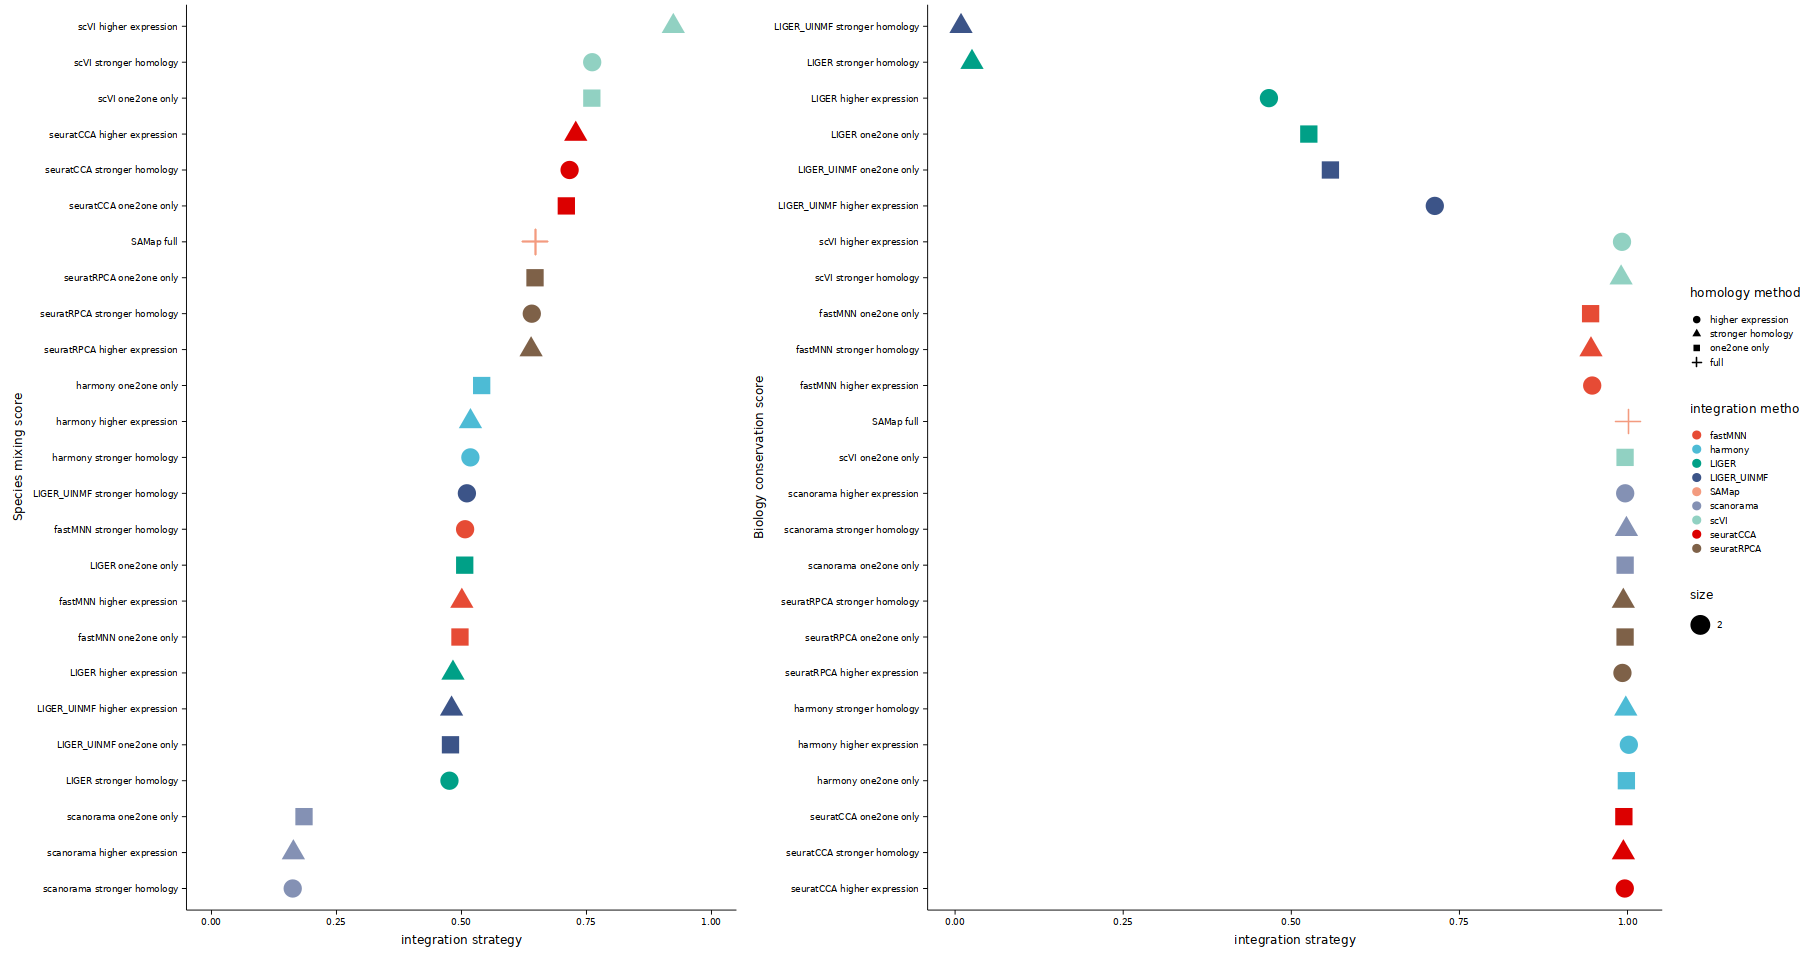

In [39]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_grid(batch + theme(legend.position = 'none'), bio, rel_widths = c(0.7, 1))

## overall ranking

In [40]:
batch_ranking = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>%
select(type, avg_score, integration_method, homology_method)

In [41]:
bio_ranking = bio_dd

In [42]:
merged = merge(batch_ranking, bio_ranking, by = 'type', suffixes = c("_batch", "_bio")) %>% distinct(type, .keep_all = TRUE) %>% 
mutate(total_score = 0.4*avg_score_batch + 0.6*avg_score_bio) %>% arrange(desc(total_score)) %>% 
mutate(ranking = seq(from = 1, to = nrow(.)))  

merged

type,avg_score_batch,integration_method_batch,homology_method_batch,integration_method_bio,homology_method_bio,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,⋯,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score_bio,total_score,ranking
<chr>,<dbl>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
seuratCCA higher expression,0.7285799,seuratCCA,higher expression,seuratCCA,higher expression,0.9977367,0.93038888,0.9803482,0.9951815,⋯,2,higher expression,seuratCCA,8.826904e-05,0.003660304,0.9959010,10,0.99190355,0.8865741,1
seuratCCA stronger homology,0.7162927,seuratCCA,stronger homology,seuratCCA,stronger homology,0.9973928,0.92707438,1.0000000,1.0000000,⋯,1,stronger homology,seuratCCA,6.178833e-04,0.004252996,0.9938058,12,0.99126798,0.8812778,2
seuratCCA one2one only,0.7097397,seuratCCA,one2one only,seuratCCA,one2one only,1.0000000,0.87672636,0.9743270,0.9873267,⋯,3,one2one only,seuratCCA,0.000000e+00,0.004044490,0.9945429,11,0.98755329,0.8764278,3
scVI one2one only,0.7607471,scVI,one2one only,scVI,one2one only,0.9670751,0.54719240,0.7886224,0.7366960,⋯,14,one2one only,scVI,1.765381e-03,0.003536263,0.9963395,9,0.94905088,0.8737294,4
scVI higher expression,0.9237055,scVI,higher expression,scVI,higher expression,0.0000000,0.54781704,0.0000000,0.0000000,⋯,26,higher expression,scVI,3.883838e-03,0.004825579,0.9917817,15,0.82081618,0.8619719,5
scVI stronger homology,0.7614758,scVI,stronger homology,scVI,stronger homology,0.8501007,0.53448235,0.5761598,0.6399138,⋯,19,stronger homology,scVI,4.148645e-03,0.005211344,0.9904180,16,0.92236720,0.8580106,6
seuratRPCA one2one only,0.6471205,seuratRPCA,one2one only,seuratRPCA,one2one only,1.0000000,0.92175983,0.8862142,0.7596701,⋯,9,one2one only,seuratRPCA,3.530762e-04,0.003534824,0.9963446,8,0.97545786,0.8441229,7
seuratRPCA higher expression,0.6392776,seuratRPCA,higher expression,seuratRPCA,higher expression,1.0000000,0.92914527,0.9082084,0.7982777,⋯,7,higher expression,seuratRPCA,2.118457e-03,0.004645310,0.9924189,14,0.97571671,0.8411411,8
seuratRPCA stronger homology,0.6406743,seuratRPCA,stronger homology,seuratRPCA,stronger homology,1.0000000,0.89862547,0.8475258,0.7315218,⋯,12,stronger homology,seuratRPCA,8.826904e-04,0.004278191,0.9937167,13,0.96885702,0.8375839,9


In [43]:
order_type = levels(factor(merged$type, levels = merged$type))

In [44]:
cb_platte_9

[1] "#332288" "#88CCEE" "#44AA99" "#117733" "#999933" "#DDCC77" "#CC6677"
[8] "#882255" "#AA4499"

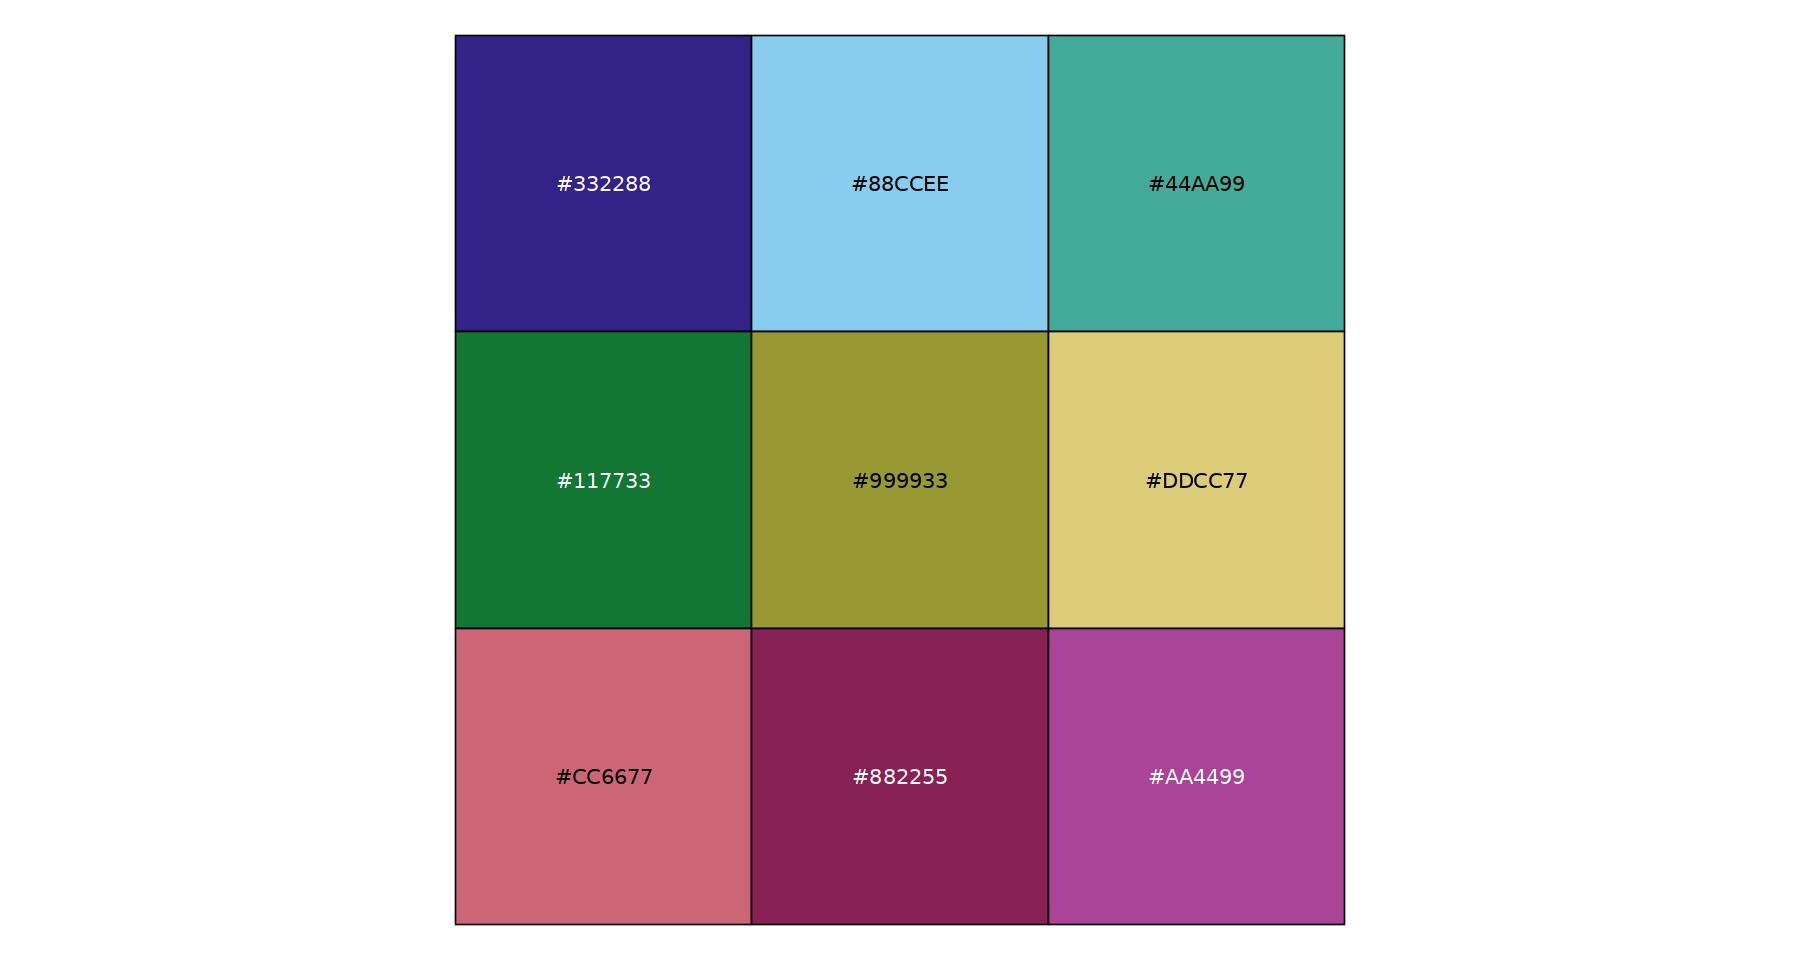

In [45]:
show_col(cb_platte_9)

## do not use color no.3 and no.7 together, use 1, 4, 7
## https://davidmathlogic.com/colorblind/#%23332288-%2388CCEE-%2344AA99-%23117733-%23999933-%23DDCC77-%23CC6677-%23882255-%23AA4499
## scale color npg is also ok
## https://davidmathlogic.com/colorblind/#%23E64B35-%234DBBD5-%2300A087-%233C5488-%23F39B7F-%238491B4-%2391D1C2-%23DC0000-%237E6148

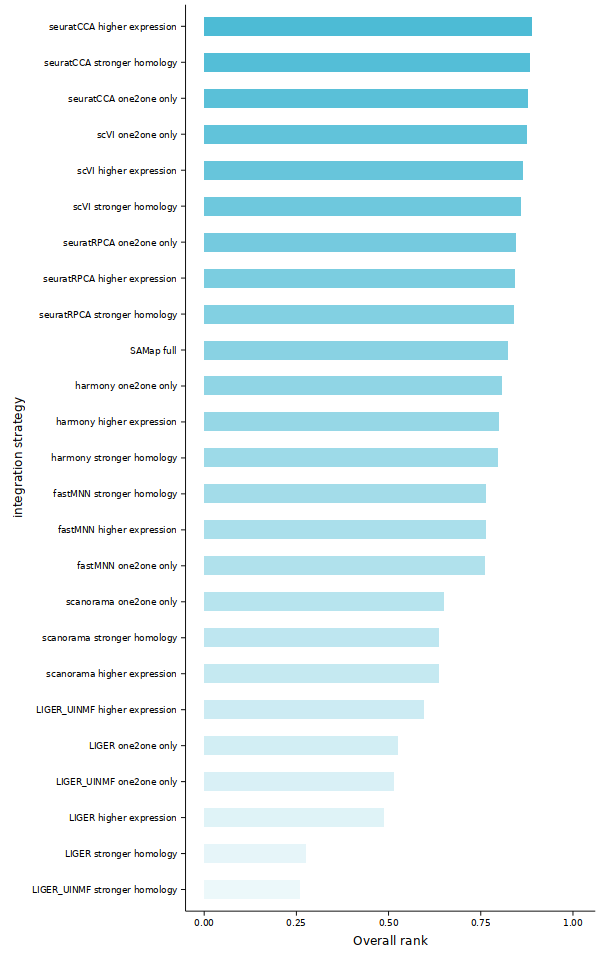

In [46]:
options(repr.plot.width = 5, repr.plot.height = 8)

merged  %>% 
ggplot(aes(x = factor(type, levels = order_type), y = total_score, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x   +
labs(y = 'Overall rank', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) + 
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

overall = merged %>% 
ggplot(aes(x = factor(type, levels = order_type), y = total_score, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Overall score', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) +
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

## 6.69 inches (170 mm) max width for full-page figures
## 8.85 inches (225 mm) max height
## 300 dpi
## lines min 0.25 pt width
## mas fig size 10MB

## batch ranking

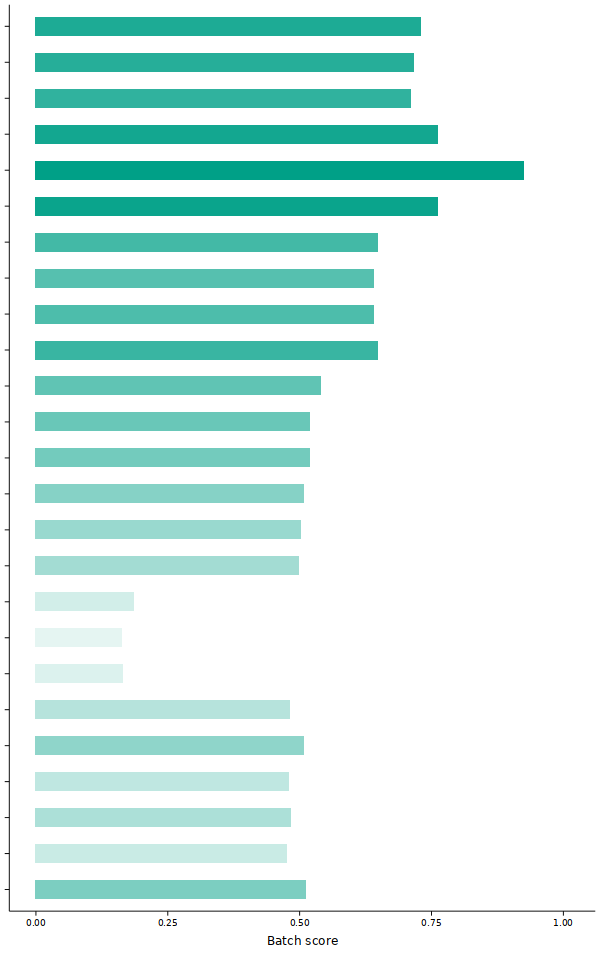

In [47]:
options(repr.plot.width = 5, repr.plot.height = 8)

ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(avg_score_rank = dense_rank(desc(avg_score))) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = avg_score, alpha = avg_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), panel.background = element_blank(), legend.position = 'none')


batch_overall = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(avg_score_rank = dense_rank(desc(avg_score))) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = avg_score, alpha = avg_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), panel.background = element_blank(), legend.position = 'none')

## batch scores

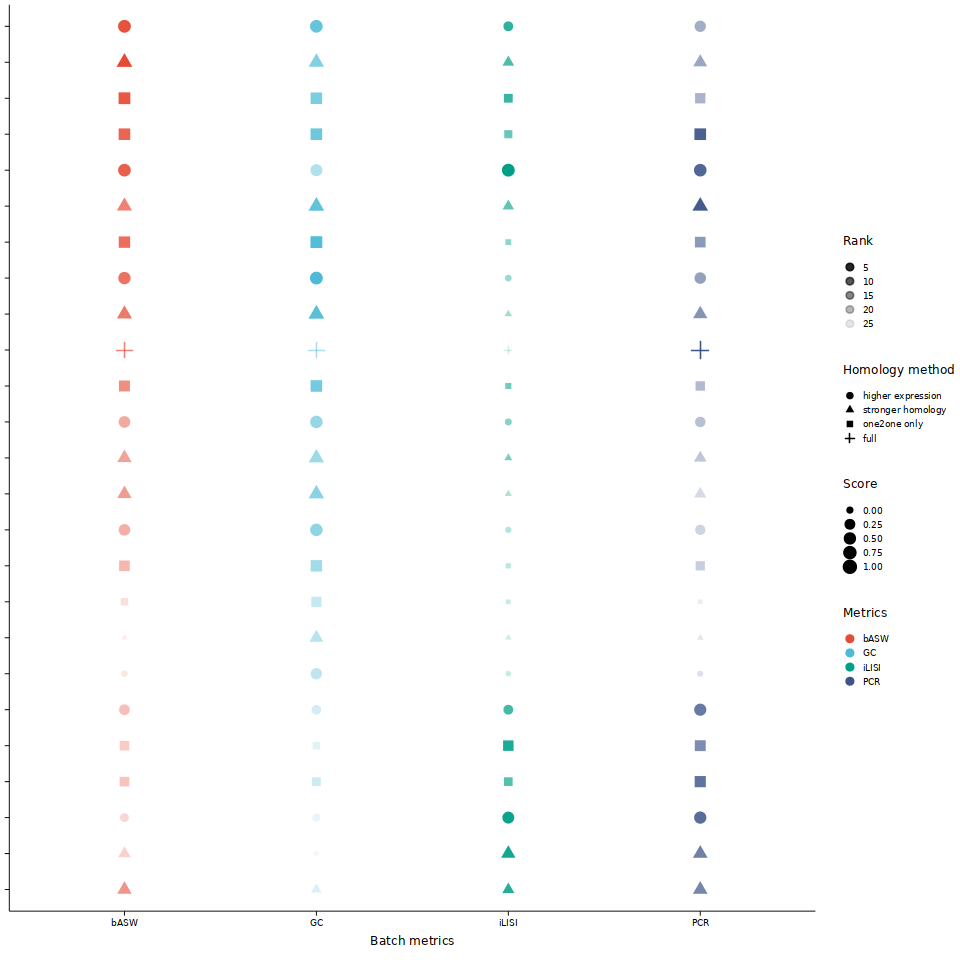

In [48]:
options(repr.plot.width = 8, repr.plot.height = 8)

ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled, ifelse(grepl("graph", Metrics), graph_conn_scaled, ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled, pcr_scaled)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) + 
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics') 

In [49]:
batch_detail = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled, ifelse(grepl("graph", Metrics), graph_conn_scaled, ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled, pcr_scaled)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics')

## Bio ranking

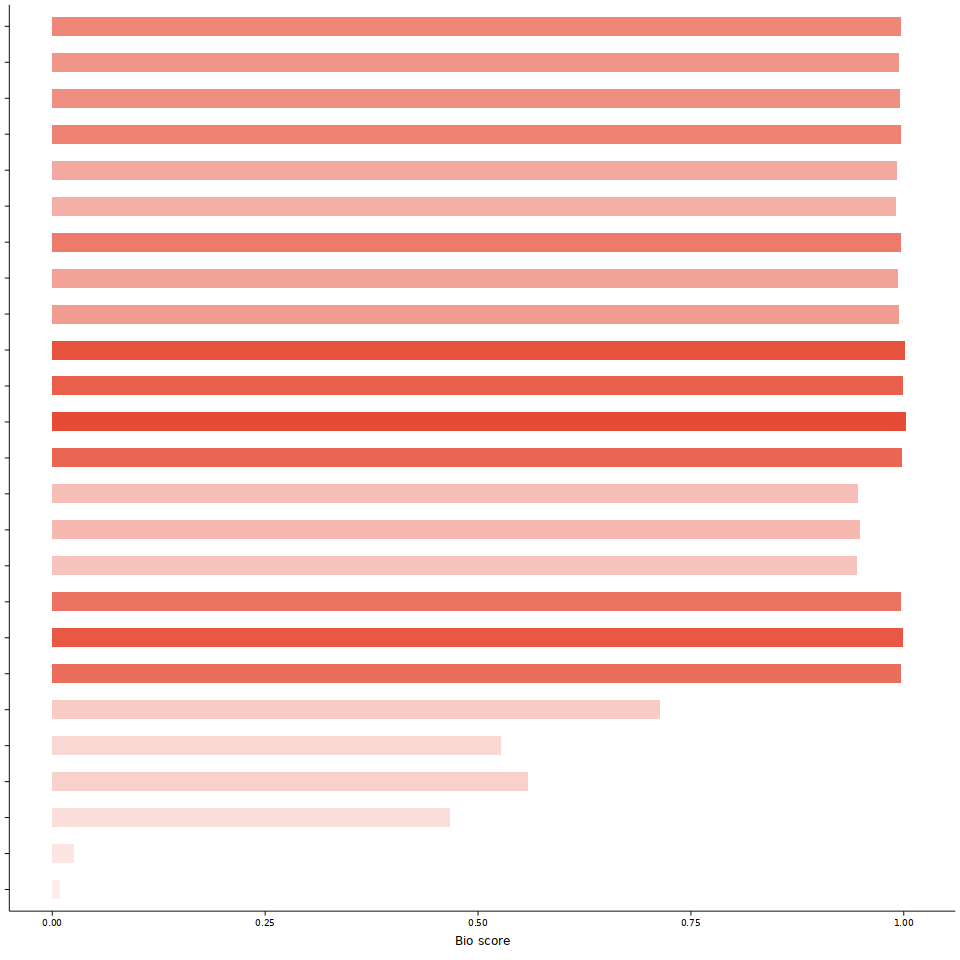

In [50]:
bio_ranking%>%
ggplot(aes(x = factor(type, levels = order_type), y = acc_loss_scaled, alpha =acc_loss_scaled_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width  = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +
scale_x_discrete(limits = rev) + scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none') + 
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

In [51]:
bio_overall = bio_ranking%>%
ggplot(aes(x = factor(type, levels = order_type), y = acc_loss_scaled, alpha =acc_loss_scaled_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width  = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +
scale_x_discrete(limits = rev) + scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

## Bio detail

In [52]:
head(bio_ranking)

,type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,seuratCCA higher expression,seuratCCA,higher expression,0.9977367,0.9303889,0.9803482,0.9951815,2,2,2,2,higher expression,seuratCCA,8.826904e-05,0.003660304,0.9959010,10,0.9919035
2,seuratCCA stronger homology,seuratCCA,stronger homology,0.9973928,0.9270744,1.0000000,1.0000000,3,4,1,1,stronger homology,seuratCCA,6.178833e-04,0.004252996,0.9938058,12,0.9912680
3,seuratCCA one2one only,seuratCCA,one2one only,1.0000000,0.8767264,0.9743270,0.9873267,1,13,3,3,one2one only,seuratCCA,0.000000e+00,0.004044490,0.9945429,11,0.9875533
4,harmony one2one only,harmony,one2one only,1.0000000,1.0000000,0.9242065,0.8079804,1,1,5,4,one2one only,harmony,4.854797e-03,0.002989057,0.9982739,4,0.9852284
5,harmony higher expression,harmony,higher expression,1.0000000,0.9043734,0.9221091,0.8107387,1,10,4,5,higher expression,harmony,1.147498e-03,0.001949343,1.0019493,1,0.9834205
6,harmony stronger homology,harmony,stronger homology,1.0000000,0.9112067,0.9128043,0.8067154,1,9,6,6,stronger homology,harmony,3.883838e-03,0.003237085,0.9973971,5,0.9794540


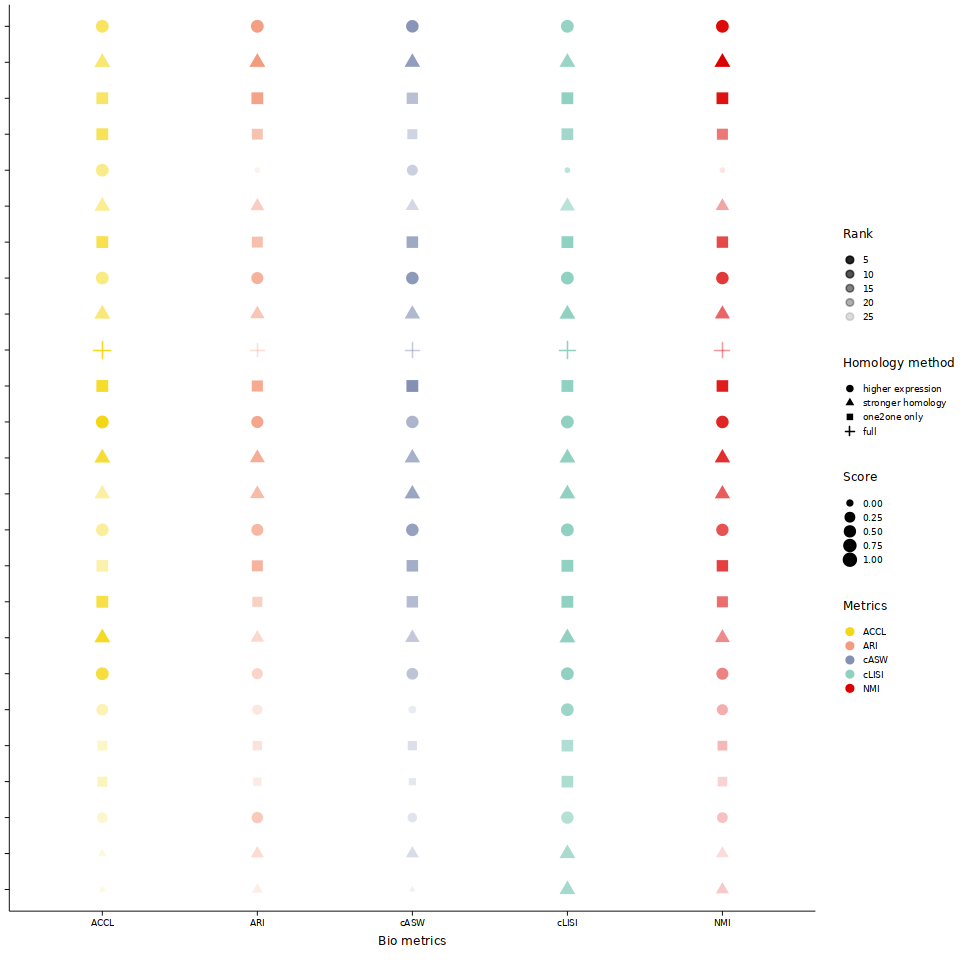

In [53]:
bio_ranking %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled, ifelse(grepl("NMI", Metrics), NMI_scaled, ifelse(grepl("ARI", Metrics), ARI_scaled, ifelse(grepl("silhouette", Metrics), silhouette_scaled, acc_loss_scaled))))) %>%
mutate(Metrics = gsub("cLISI_scaled_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_rank", "ACCL", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3)) + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF"))

In [54]:
bio_detail = bio_ranking %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled, ifelse(grepl("NMI", Metrics), NMI_scaled, ifelse(grepl("ARI", Metrics), ARI_scaled, ifelse(grepl("silhouette", Metrics), silhouette_scaled, acc_loss_scaled))))) %>%
mutate(Metrics = gsub("cLISI_scaled_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_rank", "ACCL", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method', guide = 'none') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans(), guide = 'none') +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3), guide = 'none') + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF"))

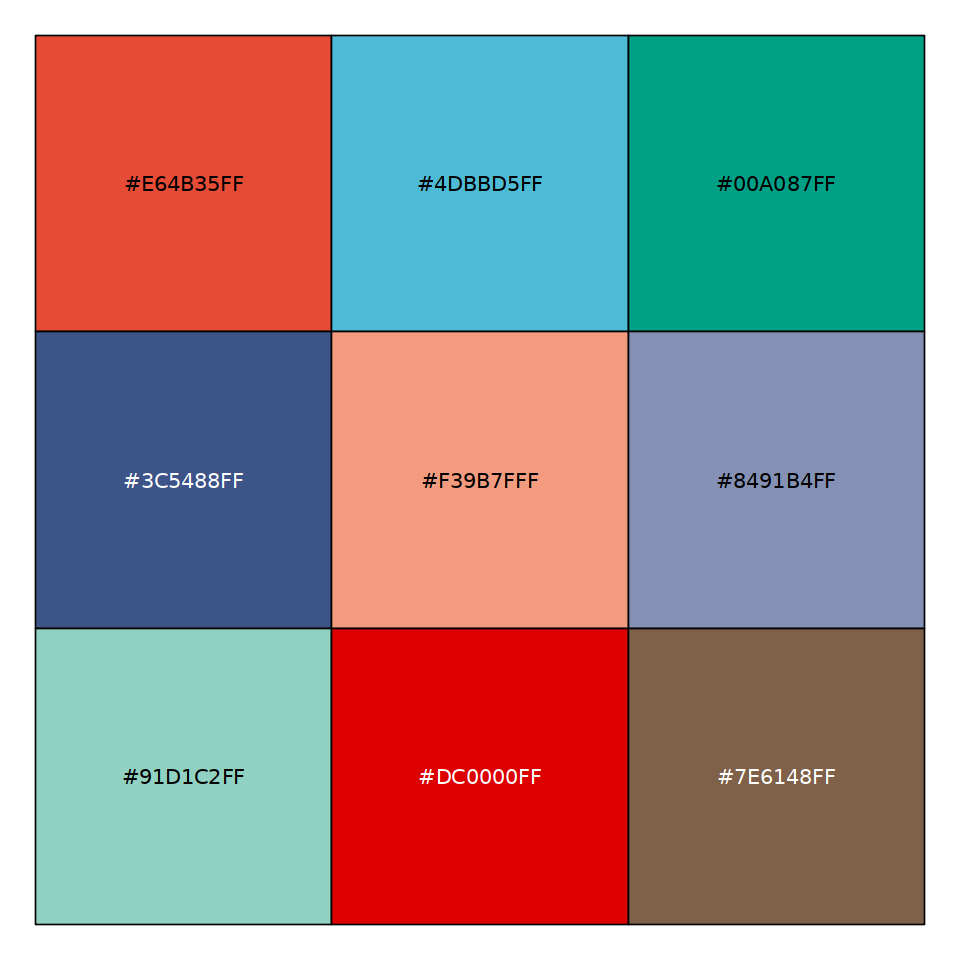

In [55]:
show_col(pal_npg("nrc")(9))

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


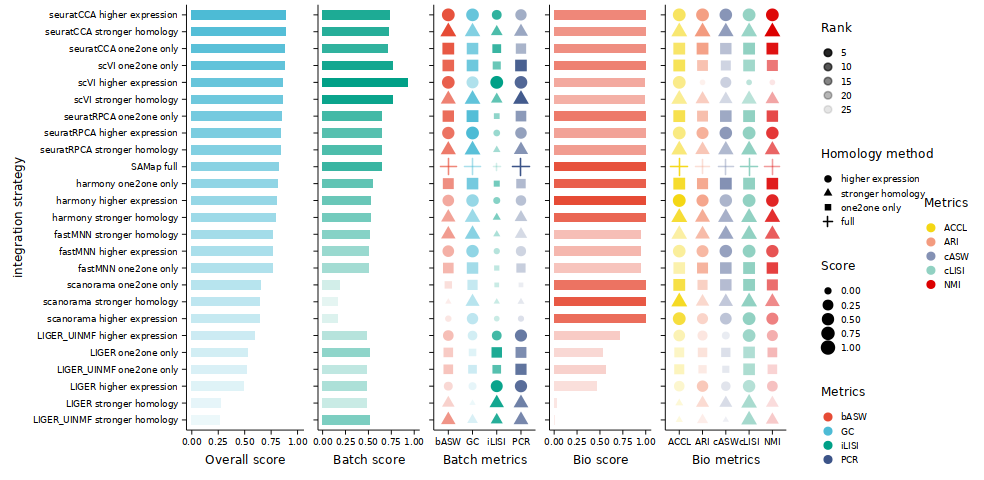

In [56]:
options(repr.plot.width = 8.2, repr.plot.height = 4)

plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))

In [57]:
getwd()

[1] "/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/batch_metrics/cross_species/analysis"

In [58]:
pdf("heart_hs_mf_mm_summary_metrics.pdf", height  = 4, width = 8.2)

plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))

dev.off()


Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


png 
  2

In [59]:
ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% write_csv("heart_hs_mf_mm_batch_ranked.csv")

In [60]:
bio_ranking  %>% write_csv("heart_hs_mf_mm_bio_ranked.csv")